In [3]:
# import modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 16,8

import scipy.stats as st


# uncomment to suppress warning
# import warnings
# warnings.filterwarnings('ignore')

In [4]:
!ls

Session1.ipynb
bigmartsales-cleaned.csv


In [5]:
df = pd.read_csv('bigmartsales-cleaned.csv')
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Profit                       float64
dtype: object

In [8]:
df.Outlet_Establishment_Year = df.Outlet_Establishment_Year.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), object(8)
memory usage: 865.7+ KB

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,2181.288914,13.414514
std,5.776851,0.051598,62.258099,1706.499616,1.701840
min,0.000000,0.000000,31.300000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,13086.964800,24.000000


In [10]:
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,2181.288914,13.414514
std,5.776851,0.051598,62.258099,1706.499616,1.701840
min,0.000000,0.000000,31.300000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,13086.964800,24.000000


In [11]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,6113,6473,8523
unique,1559,2,16,10,9,3,8,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,1463,2793,2793,5577


In [12]:
# missing Value
missing_value_count = df.isnull().sum().sort_values(ascending=False)
missing_value_count

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                   749
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [13]:
#Percentage of missing values
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Item_Weight                   8.787985
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

In [14]:
pd.concat([ df.isnull().sum().sort_values(ascending=False), (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100 ], axis=1, keys=['missing count', '% missing'])

,missing count,% missing
Outlet_Size,2410,28.276428
Outlet_Location_Type,2050,24.052564
Item_Weight,749,8.787985
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000


<Axes: >

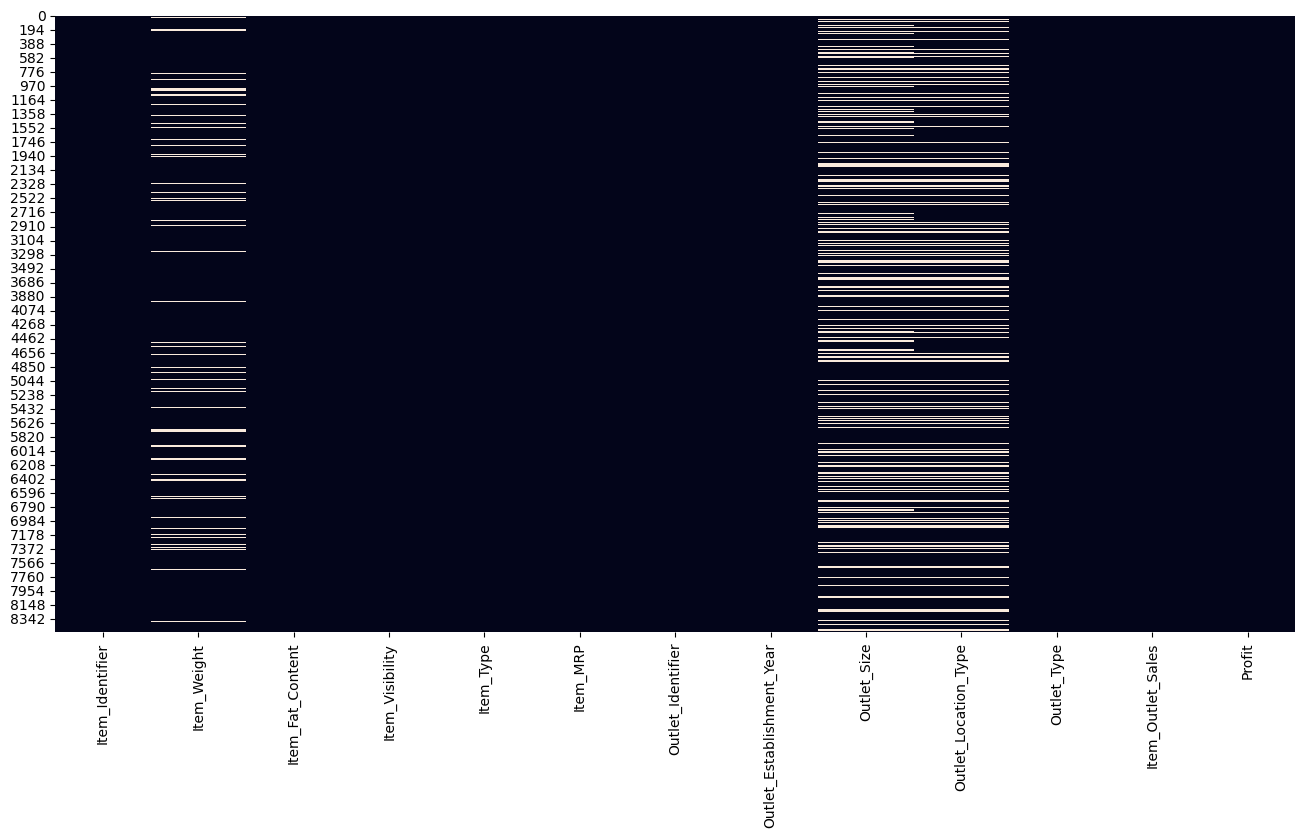

In [15]:
# Visualizing Missing Valuse
sns.heatmap(df.isnull(), cbar=False)

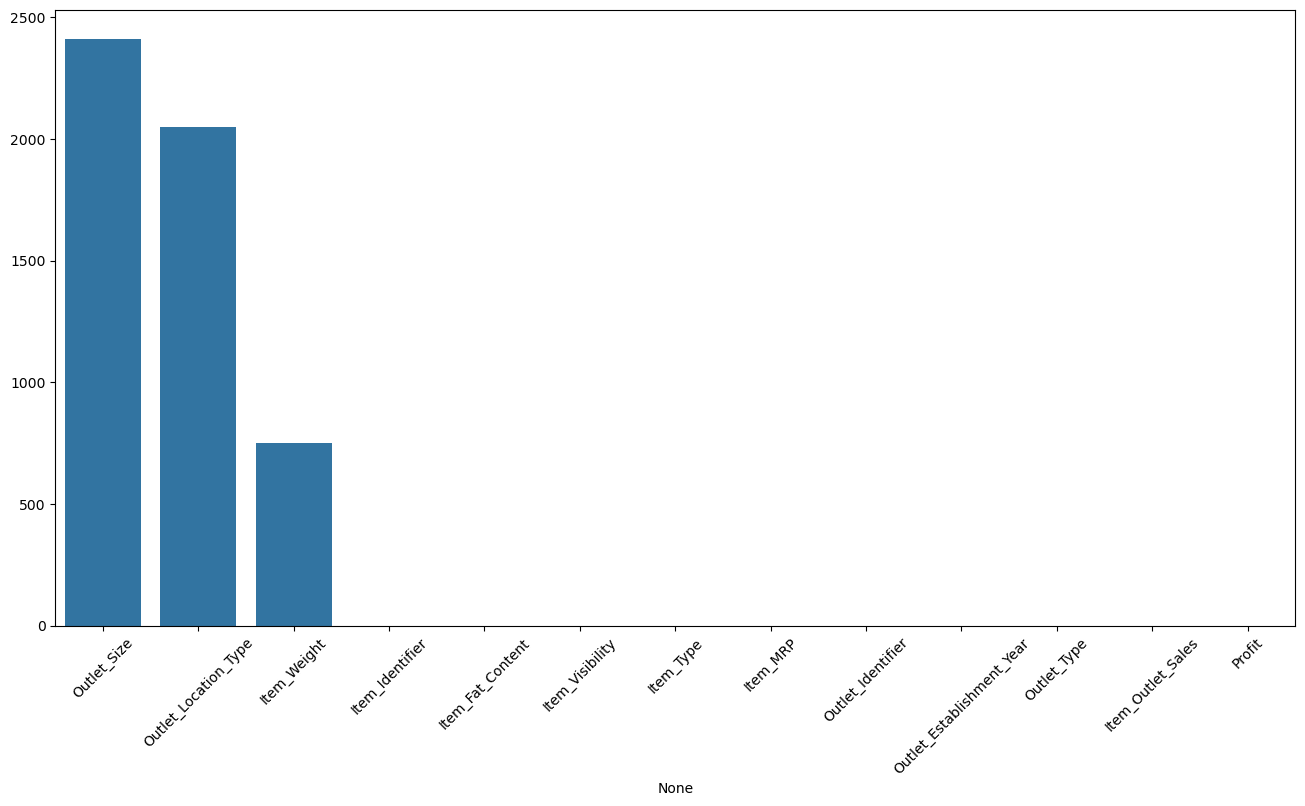

In [16]:
plt.xticks(rotation=45)
sns.barplot(x=missing_value_count.index, y=missing_value_count.values)
plt.show()

# Non Standard Missing values

In [17]:
for col in df.select_dtypes('object').columns:
    display(df[col].value_counts())

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: count, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [18]:
df.Outlet_Location_Type = df.Outlet_Location_Type.str.strip() \
.replace('?', np.nan) \
.replace('--', np.nan) \
.replace('-', np.nan) \
.replace('na', np.nan) \
.replace('NAN', np.nan)

In [19]:
df.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 2    2793
Tier1     2388
Tier 3     932
Name: count, dtype: int64

In [20]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2410
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [21]:
df.dropna(axis=0, how='any')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4,OUT018,2009,Medium,Tier 2,Supermarket Type2,556.6088,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8,OUT046,1997,Small,Tier1,Supermarket Type1,3608.6360,13.2
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2


In [22]:
# this shows 37% of the data is dropped, not good to drop all na
1 - df.dropna(axis=0).shape[0]/df.shape[0]

0.3706441393875396

  # Interpolate:
    polynomial (order=3): One continuous polynomial of degree 3 fits the entire dataset.
    spline (order=3): Multiple piecewise polynomials, each of degree 3, smoothly joined at different data points.

This means:

✅ Polynomial interpolation forces a single equation across all data points (which can cause oscillations).

✅ Spline interpolation adapts locally to the data, making it more stable and smoother overall.


Also df.fillna, look for method : {'backfill', 'bfill', 'ffill', None}
the is also df.fill, df.bfill

In [23]:
df.Item_Weight.interpolate()

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [24]:
# filling missing value with median
df.Item_Weight.fillna(df.Item_Weight.median(), inplace=True)

C:\Users\kumars\AppData\Local\Temp\ipykernel_28848\4213034475.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Item_Weight.fillna(df.Item_Weight.median(), inplace=True)


In [25]:
df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [26]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()

Outlet_Location_Type
Tier 2    2681.603542
Tier 3    2298.995256
Tier1     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [27]:
index = np.where(df.Outlet_Location_Type.isnull())[0]
index

array([   3,    8,    9, ..., 8509, 8514, 8519], dtype=int64)

In [28]:
for ind in index:
    if df.loc[ind, "Item_Outlet_Sales"] <= 2100:
        df.loc[ind,"Outlet_Location_Type"] = "Tier 1"
    elif df.loc[ind, "Item_Outlet_Sales"] <= 2500:
        df.loc[ind,"Outlet_Location_Type"] = "Tier 2"
    else :
        df.loc[ind,"Outlet_Location_Type"] = "Tier 3"

In [29]:
df.Outlet_Size.isnull().sum()

2410

In [30]:
df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [31]:
# fill missing value by frequency
df.Outlet_Size.fillna("Medium", inplace=True)

C:\Users\kumars\AppData\Local\Temp\ipykernel_28848\2851493387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Outlet_Size.fillna("Medium", inplace=True)


In [32]:
(df.Item_Visibility ==0).sum()

526

In [33]:
df.Item_Visibility.replace(0, df.Item_Visibility.mean(), inplace=True)

C:\Users\kumars\AppData\Local\Temp\ipykernel_28848\345659226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Item_Visibility.replace(0, df.Item_Visibility.mean(), inplace=True)


In [34]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

# Handle Non-Numeric Data

Type of encoding
There are many ways to encode the categorical variables:
● N-1 Dummy encoding   -> drop one categorial 
● One-hot encoding     -> use all categorical 
● Label encoding       -> alphabetical order , High -> 0, Medium -> 1, Small -> 3
● Ordinal encoding     -> define order , like small -> 0 , medium -> 1, high -> 3
● Frequency encoding   
● Target encoding

# One-Hot Encoding (Using Pandas)

In [35]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,9,3,4,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,1985,Medium,Tier 2,Supermarket Type1
freq,10,5517,1232,935,1463,5203,2954,5577


In [36]:
#For a categorical variable that can take k values, k dummy variables are created
pd.get_dummies(df, columns=df.select_dtypes('object').columns, dtype=int)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8,3735.1380,11.5,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.3,443.4228,14.3,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,17.500,0.016760,141.6,2097.2700,14.5,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.200,0.066132,182.1,732.3800,13.6,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,8.930,0.066132,53.9,994.7052,14.1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834,14.1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8519,8.380,0.046982,108.2,549.2850,14.2,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1,1193.1136,9.5,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8521,7.210,0.145221,103.1,1845.5976,14.2,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [37]:
# using sklean
from sklearn.preprocessing import OneHotEncoder

In [38]:
one_hot_encoder = OneHotEncoder(dtype=int)
matrix_one_hot_encode = one_hot_encoder.fit_transform(df.select_dtypes('object'))
matrix_one_hot_encode

<8523x1607 sparse matrix of type '<class 'numpy.int32'>'
	with 68184 stored elements in Compressed Sparse Row format>

In [39]:
one_hot_encoder.categories_

[array(['DRA12', 'DRA24', 'DRA59', ..., 'NCZ42', 'NCZ53', 'NCZ54'],
       dtype=object),
 array(['Low Fat', 'Regular'], dtype=object),
 array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
        'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
        'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
        'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object),
 array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
        'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object),
 array(['1985', '1987', '1997', '1998', '1999', '2002', '2004', '2007',
        '2009'], dtype=object),
 array(['High', 'Medium', 'Small'], dtype=object),
 array(['Tier 1', 'Tier 2', 'Tier 3', 'Tier1'], dtype=object),
 array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3'], dtype=object)]

In [40]:
pd.DataFrame(matrix_one_hot_encode.toarray(), columns=one_hot_encoder.get_feature_names_out())

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8519,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


# (N-1) dummy encoding

In [41]:
pd.get_dummies(df, columns=df.select_dtypes('object').columns, drop_first=True, dtype=int)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8,3735.1380,11.5,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,5.920,0.019278,48.3,443.4228,14.3,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
2,17.500,0.016760,141.6,2097.2700,14.5,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,19.200,0.066132,182.1,732.3800,13.6,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,8.930,0.066132,53.9,994.7052,14.1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834,14.1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.2,549.2850,14.2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1,1193.1136,9.5,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
8521,7.210,0.145221,103.1,1845.5976,14.2,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0


# Lable Encoding (Using Sklearn)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
label_encoder = LabelEncoder()
labeled_value = label_encoder.fit_transform(df.Outlet_Size)
labeled_value

array([1, 1, 1, ..., 2, 1, 2])

In [44]:
# inverse to get back original Catogerical values
label_encoder.inverse_transform(labeled_value)
label_encoder

LabelEncoder()

# Ordinal Encoding (Using sklearn)

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
ordinal_encoder = OrdinalEncoder(categories=[["Small", "Medium", "High", np.nan]])
ordinal_value = ordinal_encoder.fit_transform(df[['Outlet_Size']])
ordinal_value

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

In [47]:
ordinal_encoder.inverse_transform(ordinal_value)

array([['Medium'],
       ['Medium'],
       ['Medium'],
       ...,
       ['Small'],
       ['Medium'],
       ['Small']], dtype=object)

In [48]:
ordinal_encoder.categories_

[array(['Small', 'Medium', 'High', nan], dtype=object)]

# Freq

If a categorical variable contains too many levels, then using one-hot encoding will
increase the number of features drastically.

In [49]:
df.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [50]:
freq_encoding = df.Item_Type.value_counts()/df.shape[0]*100
freq_encoding

Item_Type
Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: count, dtype: float64

In [51]:
df.Item_Type.map(freq_encoding)

0        8.001877
1        5.221166
2        4.986507
3       14.455004
4       10.676992
          ...    
8518    14.079549
8519     7.602957
8520     6.101138
8521    14.079549
8522     5.221166
Name: Item_Type, Length: 8523, dtype: float64

# Target Encoding
Target Encoding (also called Mean Encoding) is a technique where categorical variables are encoded based on their relationship with the target variable (y) instead of assigning arbitrary numbers or one-hot encoding.

In [52]:
import pandas as pd
from sklearn.preprocessing import TargetEncoder

# Sample DataFrame
df1 = pd.DataFrame({
    'City': ['London', 'Paris', 'London', 'Paris', 'Berlin', 'Berlin'],
    'Sales': [200, 250, 220, 270, 300, 320]  # Target variable
})

# Initialize TargetEncoder
encoder = TargetEncoder()

# Fit and Transform (encoding 'City' based on 'Sales')
df1['City_encoded'] = encoder.fit_transform(df1[['City']], df1['Sales'])

print(df1)


ValueError: n_splits=5 cannot be greater than the number of members in each class.

# Scale the Data
Feature scaling is also known as data normalization
It is a technique used to transform the data into a common scale. Since the features
have various ranges

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


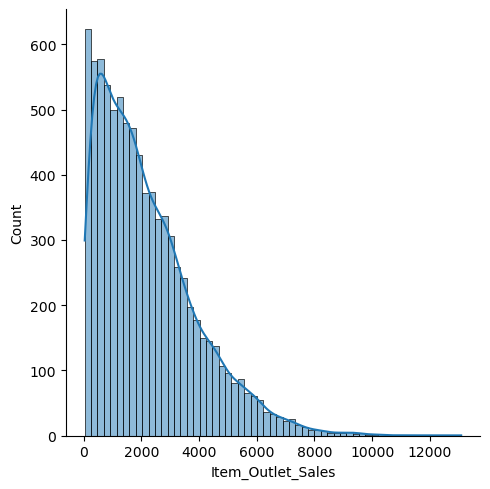

In [ ]:
sns.displot(df.Item_Outlet_Sales, kde=True)
plt.show()

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


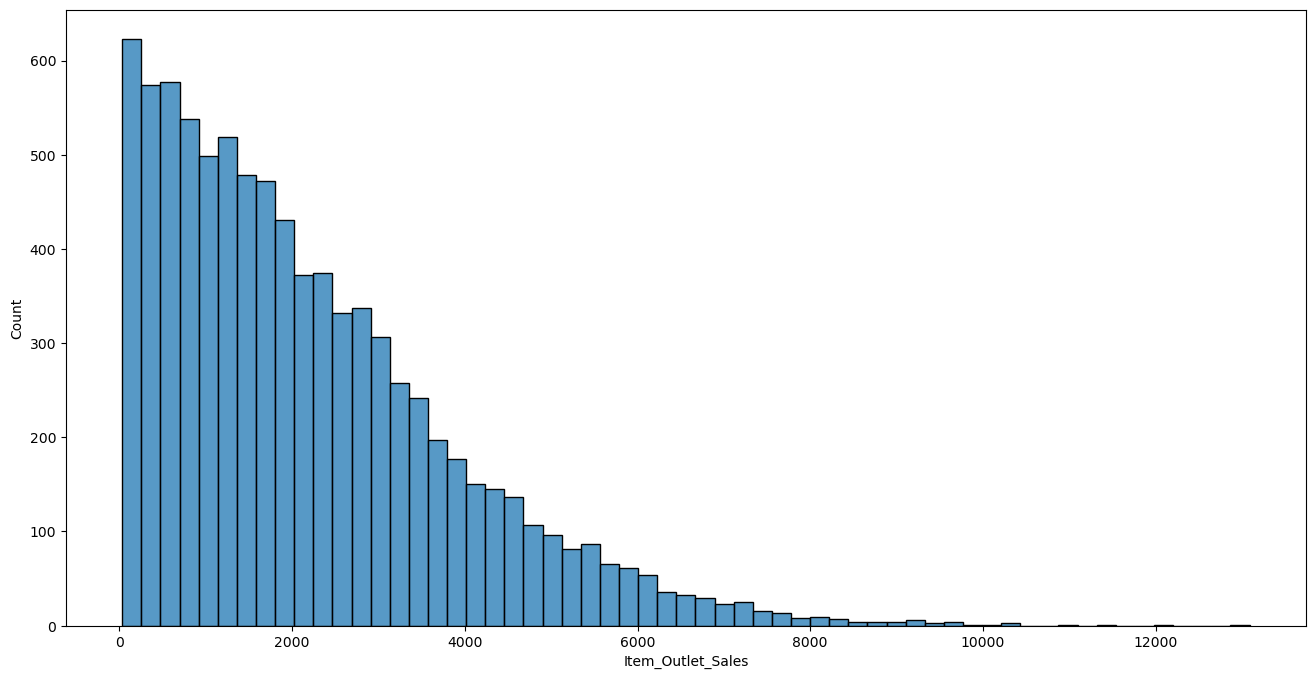

In [ ]:
sns.histplot(df.Item_Outlet_Sales)
plt.show()

# Standard Scaler (zscore)
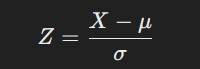

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
outlet_scaled = sc.fit_transform(df[["Item_Outlet_Sales"]])
outlet_scaled

array([[ 0.910601  ],
       [-1.01844035],
       [-0.04923754],
       ...,
       [-0.57909963],
       [-0.19672492],
       [-0.82959407]])

In [ ]:
st.zscore(df.Item_Outlet_Sales)

0       0.910601
1      -1.018440
2      -0.049238
3      -0.849103
4      -0.695373
          ...   
8518    0.349915
8519   -0.956402
8520   -0.579100
8521   -0.196725
8522   -0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Min Max scaler

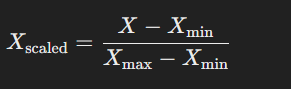

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax_scaler = MinMaxScaler()
min_max_sc = minmax_scaler.fit_transform(df[["Item_Outlet_Sales"]])
min_max_sc

array([[0.28358666],
       [0.03141895],
       [0.15811486],
       ...,
       [0.08885035],
       [0.13883505],
       [0.05610527]])

# outliers

In [ ]:
df_num = df.select_dtypes('number')
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,9.30,0.016047,249.8,3735.1380,11.5
1,5.92,0.019278,48.3,443.4228,14.3
2,17.50,0.016760,141.6,2097.2700,14.5
3,19.20,0.066132,182.1,732.3800,13.6
4,8.93,0.066132,53.9,994.7052,14.1


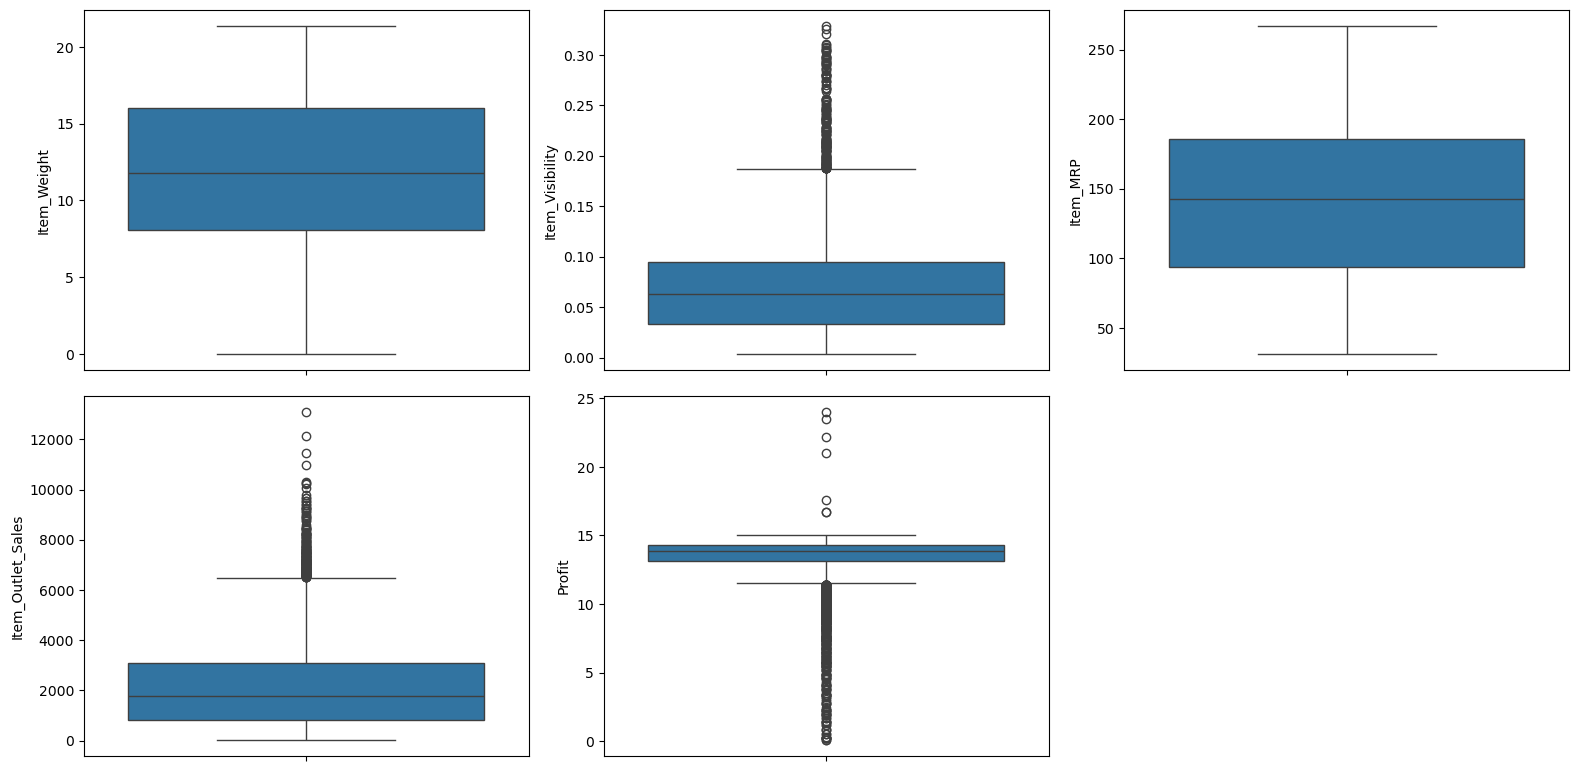

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3)
ax = ax.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num[col], ax=ax[i])
    plt.tight_layout()

ax[5].set_visible(False)
plt.show()

In [ ]:
q1 = df_num.quantile(0.25)
q2 = df_num.quantile(0.50)
q3 = df_num.quantile(0.75)

display(q1,q2,q3)

Item_Weight            8.050000
Item_Visibility        0.033085
Item_MRP              93.800000
Item_Outlet_Sales    834.247400
Profit                13.150000
Name: 0.25, dtype: float64

Item_Weight            11.800000
Item_Visibility         0.062517
Item_MRP              142.700000
Item_Outlet_Sales    1794.331000
Profit                 13.900000
Name: 0.5, dtype: float64

Item_Weight            16.000000
Item_Visibility         0.094585
Item_MRP              185.650000
Item_Outlet_Sales    3101.296400
Profit                 14.300000
Name: 0.75, dtype: float64

In [ ]:
IQR = q3 - q1
lb = q1 - 1.5 * IQR
ub = q3 + 1.5 * IQR

display(lb, ub)

Item_Weight            -3.875000
Item_Visibility        -0.059165
Item_MRP              -43.975000
Item_Outlet_Sales   -2566.326100
Profit                 11.425000
dtype: float64

Item_Weight            27.925000
Item_Visibility         0.186835
Item_MRP              323.425000
Item_Outlet_Sales    6501.869900
Profit                 16.025000
dtype: float64

In [ ]:
# dropping rows if contain nay outliers
df_clipped = df_num[~((df_num < lb)| (df_num > ub)).any(axis=1)]
df_clipped

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,9.300,0.016047,249.8,3735.1380,11.5
1,5.920,0.019278,48.3,443.4228,14.3
2,17.500,0.016760,141.6,2097.2700,14.5
3,19.200,0.066132,182.1,732.3800,13.6
4,8.930,0.066132,53.9,994.7052,14.1
...,...,...,...,...,...
8517,20.750,0.083607,178.8,3608.6360,13.2
8518,6.865,0.056783,214.5,2778.3834,14.1
8519,8.380,0.046982,108.2,549.2850,14.2
8521,7.210,0.145221,103.1,1845.5976,14.2


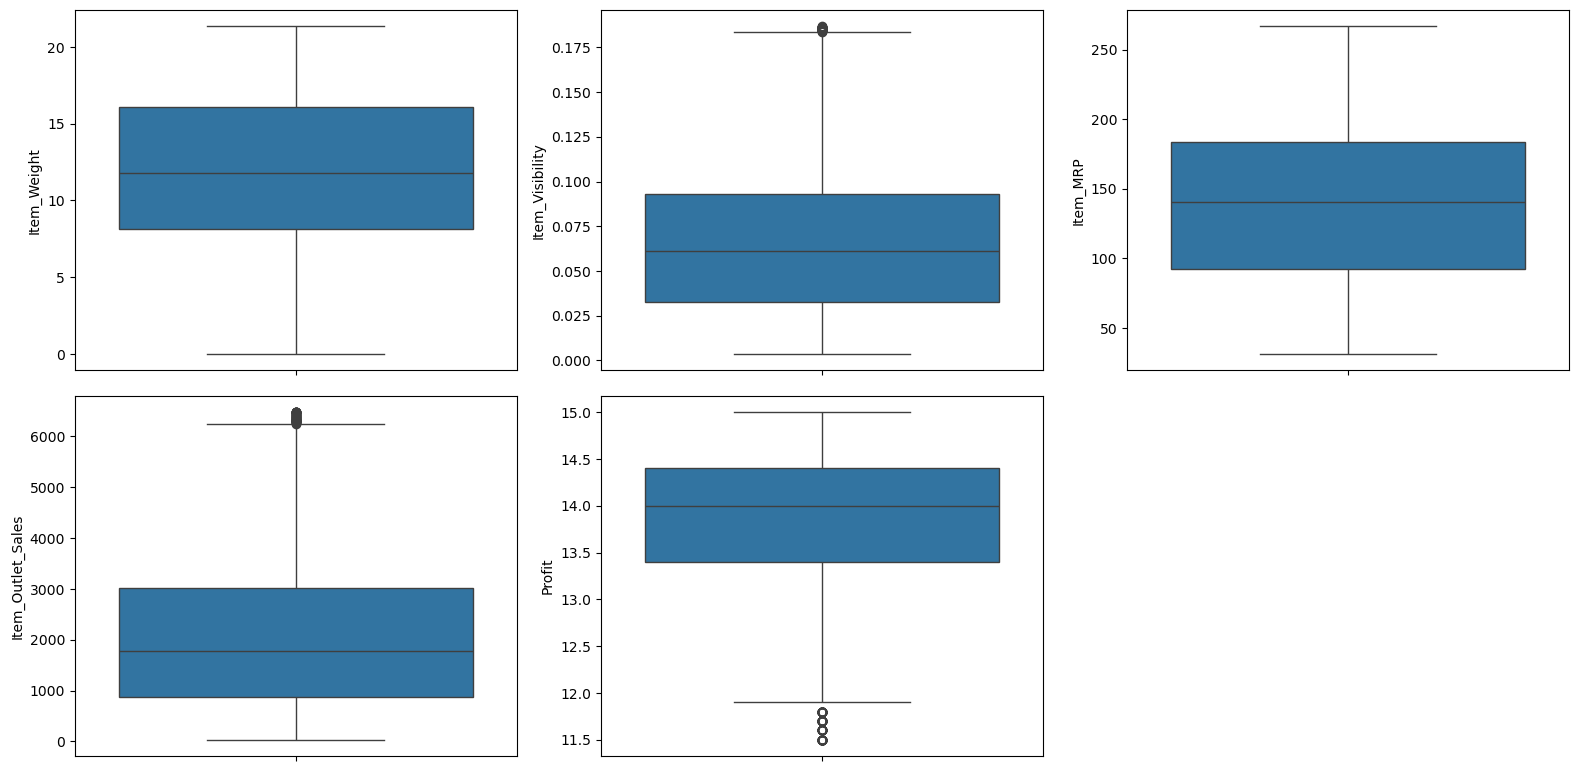

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3)
ax = ax.flatten()

for i, col in enumerate(df_clipped.columns):
    sns.boxplot(df_clipped[col], ax=ax[i])
    plt.tight_layout()

ax[5].set_visible(False)
plt.show()

np.clip() and df.clip() replace outliers with the nearest boundary instead of dropping them.

In [ ]:
# using np.clip
np.clip(df_num, lb, ub, axis=1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,9.300,0.016047,249.8,3735.1380,11.500
1,5.920,0.019278,48.3,443.4228,14.300
2,17.500,0.016760,141.6,2097.2700,14.500
3,19.200,0.066132,182.1,732.3800,13.600
4,8.930,0.066132,53.9,994.7052,14.100
...,...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834,14.100
8519,8.380,0.046982,108.2,549.2850,14.200
8520,10.600,0.035186,85.1,1193.1136,11.425
8521,7.210,0.145221,103.1,1845.5976,14.200


In [ ]:
df_num.clip(lb, ub, axis=1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,9.300,0.016047,249.8,3735.1380,11.500
1,5.920,0.019278,48.3,443.4228,14.300
2,17.500,0.016760,141.6,2097.2700,14.500
3,19.200,0.066132,182.1,732.3800,13.600
4,8.930,0.066132,53.9,994.7052,14.100
...,...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834,14.100
8519,8.380,0.046982,108.2,549.2850,14.200
8520,10.600,0.035186,85.1,1193.1136,11.425
8521,7.210,0.145221,103.1,1845.5976,14.200


# Empirical Rule 

For a normal distribution, approximately:

    68% of data falls within 1 standard deviation (μ±1σμ±1σ)

    95% of data falls within 2 standard deviations (μ±2σμ±2σ)

    99.7% of data falls within 3 standard deviations (μ±3σμ±3σ)

In [ ]:
# Outlier can be also tred using zscore]
sc = StandardScaler()
df_zscore = sc.fit_transform(df_num)
df_zscore

array([[-0.43277135, -1.11135787,  1.74768499,  0.910601  , -1.12503308],
       [-1.04543026, -1.04506727, -1.48903161, -1.01844035,  0.52034176],
       [ 1.05356091, -1.09673346,  0.00965652, -0.04923754,  0.63786854],
       ...,
       [-0.19713331, -0.71867224, -0.89790917, -0.57909963, -2.30030082],
       [-0.81160482,  1.53896846, -0.6087732 , -0.19672492,  0.46157837],
       [ 0.56415883, -0.51981553, -1.05211502, -0.82959407,  0.69663192]])

In [ ]:
df_zscore[~((df_zscore <-3) | (df_zscore > 3)).any(axis=1)] 

array([[-0.43277135, -1.11135787,  1.74768499,  0.910601  , -1.12503308],
       [-1.04543026, -1.04506727, -1.48903161, -1.01844035,  0.52034176],
       [ 1.05356091, -1.09673346,  0.00965652, -0.04923754,  0.63786854],
       ...,
       [-0.19713331, -0.71867224, -0.89790917, -0.57909963, -2.30030082],
       [-0.81160482,  1.53896846, -0.6087732 , -0.19672492,  0.46157837],
       [ 0.56415883, -0.51981553, -1.05211502, -0.82959407,  0.69663192]])

# Log Transformation
✅ Reduces Skewness → Makes distribution closer to normal.<br>
✅ Handles Outliers → Large values are compressed, reducing their impact.<br>
✅ Stabilizes Variance → Helps models like linear regression perform better.<br>
✅ Improves Interpretability → Differences become relative rather than absolute.<br>


In [ ]:
df.Item_Outlet_Sales.skew()

1.1775306028542796

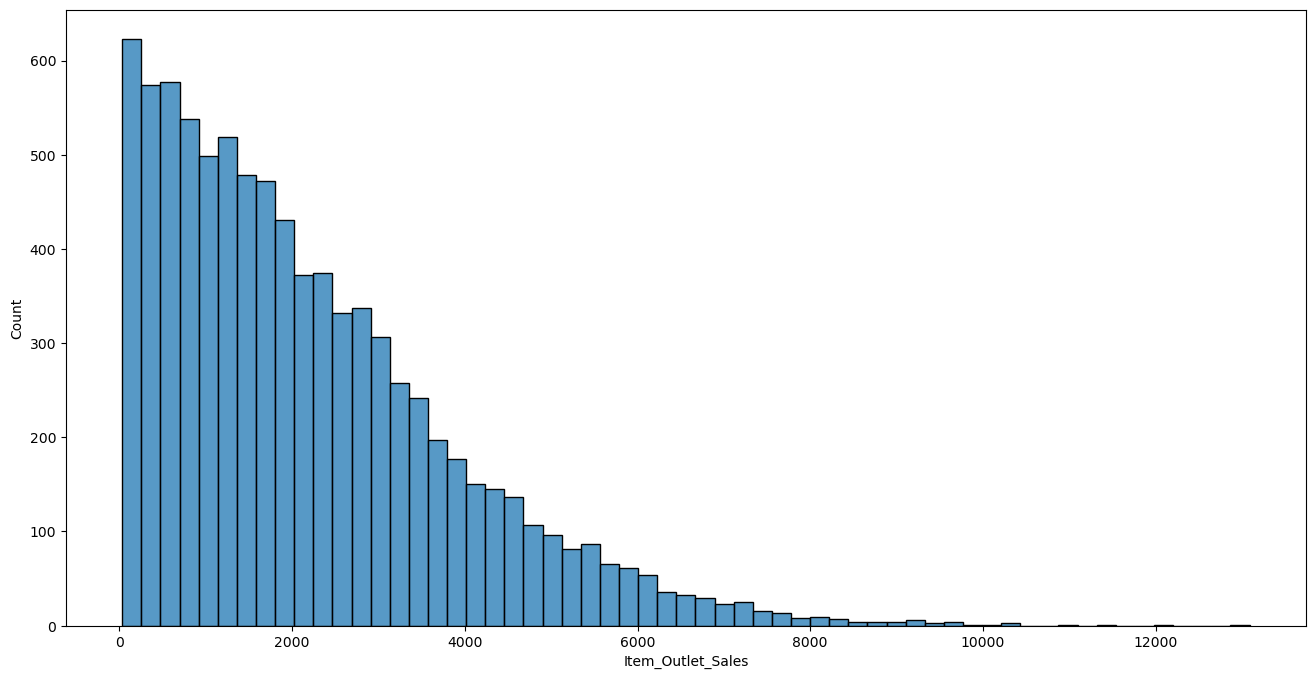

In [62]:
sns.histplot(df.Item_Outlet_Sales)
plt.show()

In [ ]:
np.log(df.Item_Outlet_Sales).skew()

-0.887753343209305

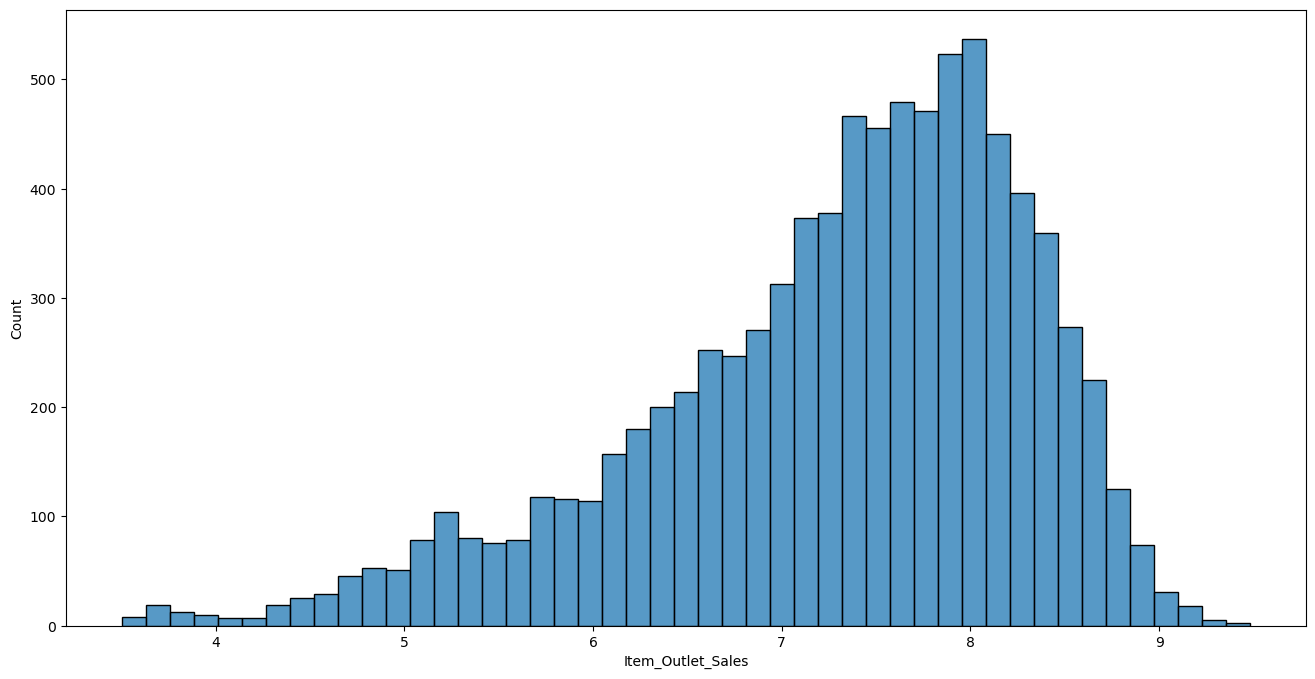

In [59]:
sns.histplot(np.log(df.Item_Outlet_Sales))
plt.show()

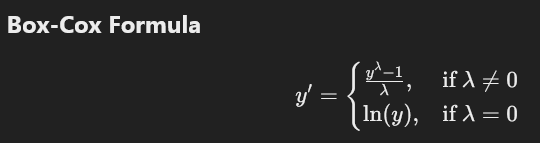

In [54]:
pd.Series(st.boxcox(df.Item_Outlet_Sales)[0]).skew()

-0.07497800502511301

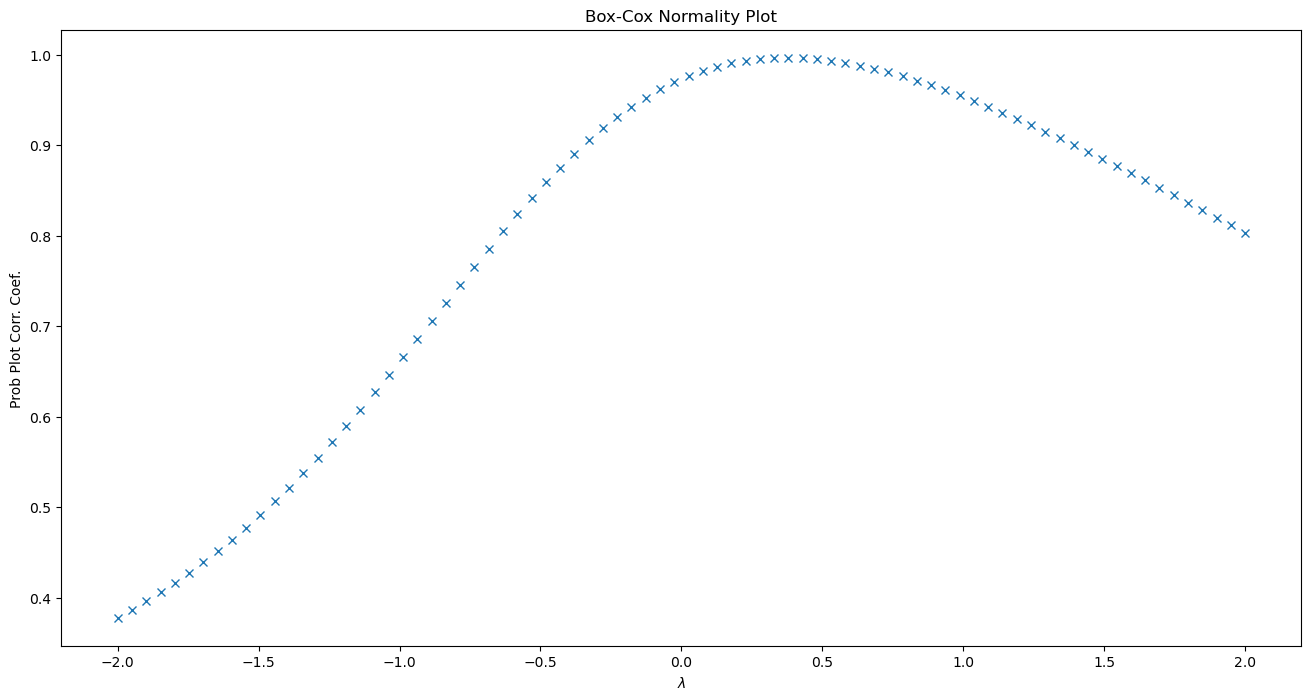

In [58]:
st.boxcox_normplot(df.Item_Outlet_Sales, -2 ,2, plot=plt)
plt.show()

### When to Use Log vs. Other Transformations?
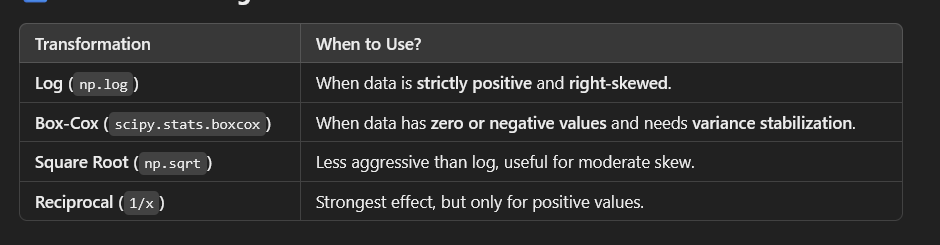

In [61]:
df.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64